<a href="https://colab.research.google.com/github/inefable12/upch_rp_2023/blob/main/Optimizacion_de_hiperparametros_RegLog1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Importar librerías

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regresión Logística

In [49]:
data = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/breast-cancer-wisconsin.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [51]:
y = data.diagnosis
X = data.drop(["diagnosis","id","Unnamed: 32"], axis=1) 

In [52]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [53]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [55]:
# Verificamos valores faltantes en y
y.isnull().sum()

0

In [56]:
# Verificamos valores faltantes en X
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [58]:
# Variables cuantitativas en X
X.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [73]:
# Construyendo el modelo de regresión logística

# 1er paso: Particionamos (usando muestreo estratificado siguiendo la 
#distribución de la variable dependiente)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.15,
                                                stratify=y)

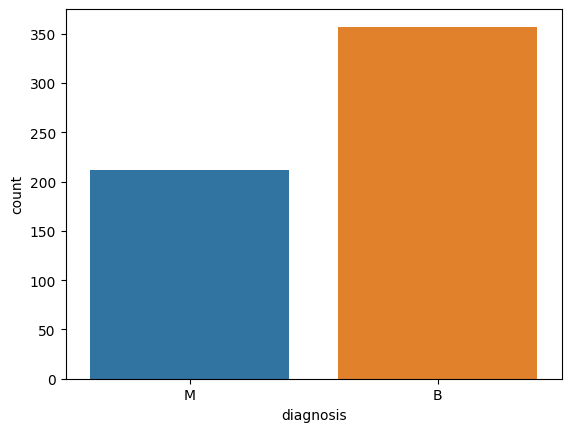

In [76]:
sns.countplot(x="diagnosis", data=data);

<Axes: xlabel='diagnosis', ylabel='count'>

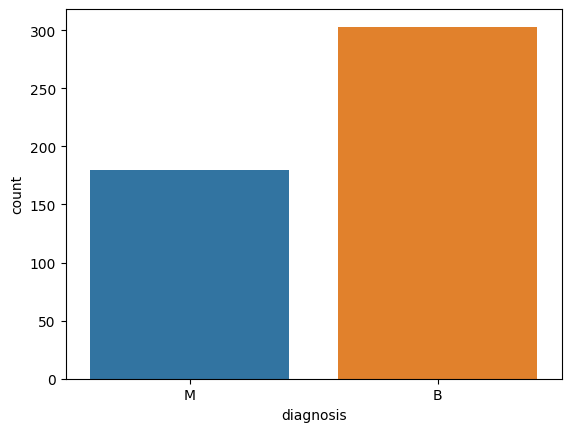

In [77]:
sns.countplot(x=ytrain)

<Axes: xlabel='diagnosis', ylabel='count'>

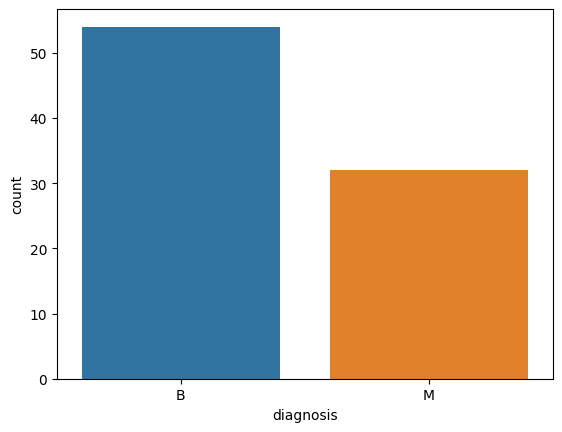

In [78]:
sns.countplot(x=ytest)

In [79]:
# 2do paso: Instanciamos la clase LogisticRegression
from sklearn.linear_model import LogisticRegression
ModelCancer1 = LogisticRegression()

In [80]:
# 3er paso: Ajustamos el modelo con los datos de entrenamiento
ModelCancer1.fit(Xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
# 4to paso: Calculamos el score del modelo de regresión logística
ModelCancer1.score(Xtest, ytest)
#0.9534883720930233

0.9534883720930233

In [88]:
# Hay problemas de convergencia?

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.15,
                                                stratify=y)
ModelCancer1 = LogisticRegression()
ModelCancer1.fit(Xtrain,ytrain)
ModelCancer1.score(Xtest, ytest)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9883720930232558

0.9186046511627907

0.9418604651162791

0.9883720930232558

type - dir - help

In [91]:
help(LogisticRegression())
#max_iter : int, default=100

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [103]:
# Mejorando el modelo, corrigiendo el warning
# 500,1000,2000,5000

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.15,
                                                stratify=y)
ModelCancer1 = LogisticRegression(max_iter=5000)
ModelCancer1.fit(Xtrain,ytrain)
ModelCancer1.score(Xtest, ytest)

0.9651162790697675

0.9651162790697675

Ya no tenemos warning, sin embargo, hemos probado punto a punto y esto no es lo más adecuado.

# Cálculo de Pronósticos: Predict

In [116]:
# Se usaron 483 instancias para entrenamiento y 86 para test
# Deseo una pequeña muestra de 20 datos (idealmente independientes pero
# los voy a seleccionar del conjunto de test)
# Construyendo el conjunto de índices

IndexSet = np.random.choice(np.array(range(0,86)), 20)
IndexSet

array([ 0, 19, 75,  8, 64, 32, 29, 76, 80, 81, 26, 63, 48, 85, 65, 63, 66,
        9,  2, 71])

In [117]:
# Muestreamos los datos de testeo
VarIndeps = Xtest.iloc[IndexSet]
VarDepen = ytest.iloc[IndexSet]

In [118]:
# Construimos pronósticos con esta pequeña muestra
YModel = ModelCancer1.predict(VarIndeps)
YModel

array(['B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B'], dtype=object)

In [119]:
# Ya que se ha construido un pronóstico usando el modelo, podemos
# analizar las métricas de calidad

from sklearn import metrics
metrics.confusion_matrix(VarDepen, YModel)

array([[13,  1],
       [ 0,  6]])

In [138]:
VarDepen.unique()
#Primer elemento en la diagonal: B: 13 fueron diagnosticados correctamente
#                                   True Positive (a11)
#Segundo elemento en la diagonal: M: 6 fueron diagnosticados correctamente
#                                   True Negative (a22)
# Tenemos 1 False Negative en a12 y 0 en False Positive en a21

array(['B', 'M'], dtype=object)

In [140]:
# Accuracy (Exactitud) = (TP+TN)/(TP+TN+FP+FN)
# Fracción de predicciones acertadas

acc1 = metrics.accuracy_score(VarDepen, YModel)
acc1

0.95

95% de aciertos identificando tumores malignos

In [ ]:
# Otras métricas:
# precisión
# Recall
# Curva ROC AUC
# F1-score

prec1 = metrics.precision_score(VarDepen, YModel)

# Optimización de hiperparámetros

In [141]:
# Optimización de hiperparámetros
# Tiene como objetivo hacer que el modelo sea lo más robusto, lo más estable 
# posible para generalizar el conocimiento en los datos de entrenamiento.

# En la documentación encontramos los parámetros de la clase LogisticRegression
# que serán los hiperparámetros del modelo a optimizar
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

**Lista de Hiperparámetros a optimizar:**

C: Inverse of regularization strength

max_iter: Número máximo de iteraciones

solver: Método de optimización

penalty

dual

fit_intercept


In [142]:
# Cargar la clase GridSearchCV
from sklearn.model_selection import GridSearchCV
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

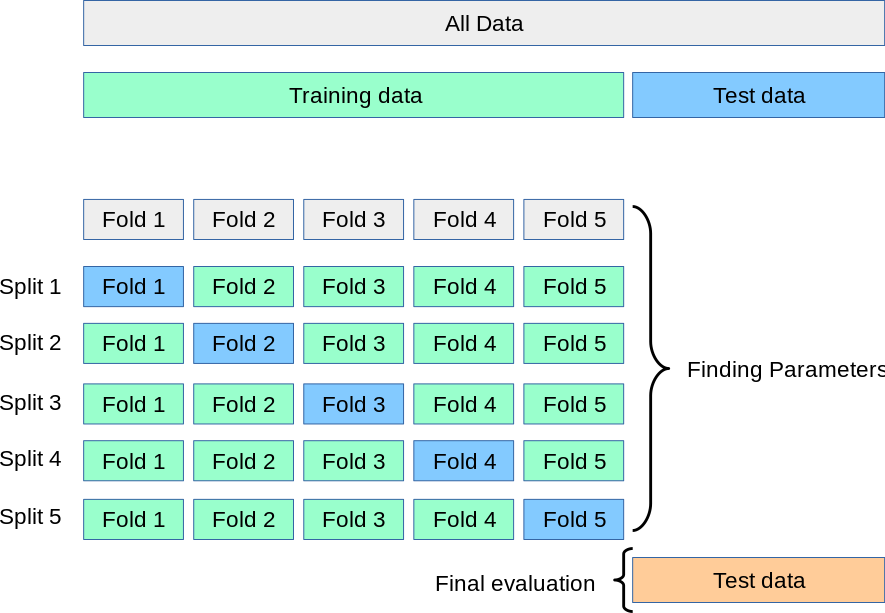

In [143]:
# Creación del estimador: Modelo
ModClassf_Cancer = LogisticRegression()

# CUIDADO:

In [145]:
# Diccionario de hiperparámetros: Definir el espacio de búsqueda de hiperparámetros
DictHP_Cancer = {"C": np.linspace(0.1,10,50),
                 "max_iter": [1000,1500,1800,2300,2800,3000,3300,3600,4000,4500,5000],
                 "solver": ["newton-cg","lbfgs","liblinear","sag","saga"],
                 "penalty": ["l1","l2","elasticnet","none"],
                 "dual": [True,False],
                 "fit_intercept": [True,False]}

In [ ]:
# Configuramos la búsquedad de hiperparámetros: 
# Instanciamos la clase GridSearchCV
ModClassf_Cancer_GS1 = GridSearchCV(ModClassf_Cancer,
                                    param_grid=DictHP_Cancer,
                                    cv=5,
                                    verbose=4,
                                    n_jobs=2)

El número de MODELOS en total es:

In [147]:
50*11*5*4*2*2*5

220000

In [159]:
# Adecuamos la configuración de la búsquedad de hiperparámetros para el horario: 

DictHP_Cancer = {"C": np.linspace(0.1,10,3),
                 "max_iter": [5000],
                 "solver": ["newton-cg","liblinear"],
                 "penalty": ["l2","elasticnet","none"],
                 "dual": [False],
                 "fit_intercept": [True,False]}

ModClassf_Cancer_GS1 = GridSearchCV(ModClassf_Cancer,
                                    param_grid=DictHP_Cancer,
                                    cv=5,
                                    verbose=4,
                                    n_jobs=2)

In [160]:
3*1*2*3*1*2*5

180

In [ ]:
import time 
IniciamosCronometro = time.time()
MejorModeloRegLog_Cancer = ModClassf_Cancer_GS1.fit(Xtrain,ytrain)
ParamosCronometro=time.time()
print("Tiempo de procesamiento transcurrido", ParamosCronometro-IniciamosCronometro)

15 minutos de tiempo con 2 procs en colab

# El mejor modelo

In [162]:
type(MejorModeloRegLog_Cancer)

sklearn.model_selection._search.GridSearchCV

In [163]:
dir(MejorModeloRegLog_Cancer)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'i

In [164]:
MejorModeloRegLog_Cancer.best_params_

{'C': 10.0,
 'dual': False,
 'fit_intercept': True,
 'max_iter': 5000,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [165]:
MejorModeloRegLog_Cancer.best_estimator_

LogisticRegression(C=10.0, max_iter=5000, solver='newton-cg')

In [166]:
MejorModeloRegLog_Cancer.best_score_

0.9586125429553265

# Serializar el mejor modelo obtenido
Guardarlo en disco duro

In [167]:
# Creamos el mejor modelo
ModCancerFinal = MejorModeloRegLog_Cancer.best_estimator_
ModCancerFinal.fit(Xtrain, ytrain)
# En este punto el modelo esta listo para consumir

LogisticRegression(C=10.0, max_iter=5000, solver='newton-cg')

In [168]:
# Guardamos el mejor modelo ajustado (memoria ram) al disco duro

import pickle
ArchivoModelCancer = "ModeloRegLog_Clase7.pkl"
with open(ArchivoModelCancer, "wb") as file:
  pickle.dump(ModCancerFinal, file)

Ahora nos vamos a dirigir a un ambiente independiente donde cargaremos el modelo en formato pkl